<a href="https://colab.research.google.com/github/senudidinaya/Deep-Learning-Practical-s/blob/main/Lab1_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True
sns.set(context="notebook", style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/Au_nanoparticle_dataset (1).csv')
df.head()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [ ]:
new_df = df[["N_total", "N_bulk", "N_surface", "R_avg"]]
new_df.head()

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831


In [ ]:
#mean

print("Mean Values: ")
print(new_df.mean())

#standard deviation -->
#this tells you how spread out data is from the mean.
#small standard deviation = values are close to the mean
#large standard deviation = values are widely spread

print("\nStandard Deviation values: ")
print(new_df.std())

#Quartiles (25%, 50%, 75%)

print("\nQuartile values: ")
print(new_df.quantile([0.25,0.5,0.75]))

Mean Values: 
N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64

Standard Deviation values: 
N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64

Quartile values: 
      N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


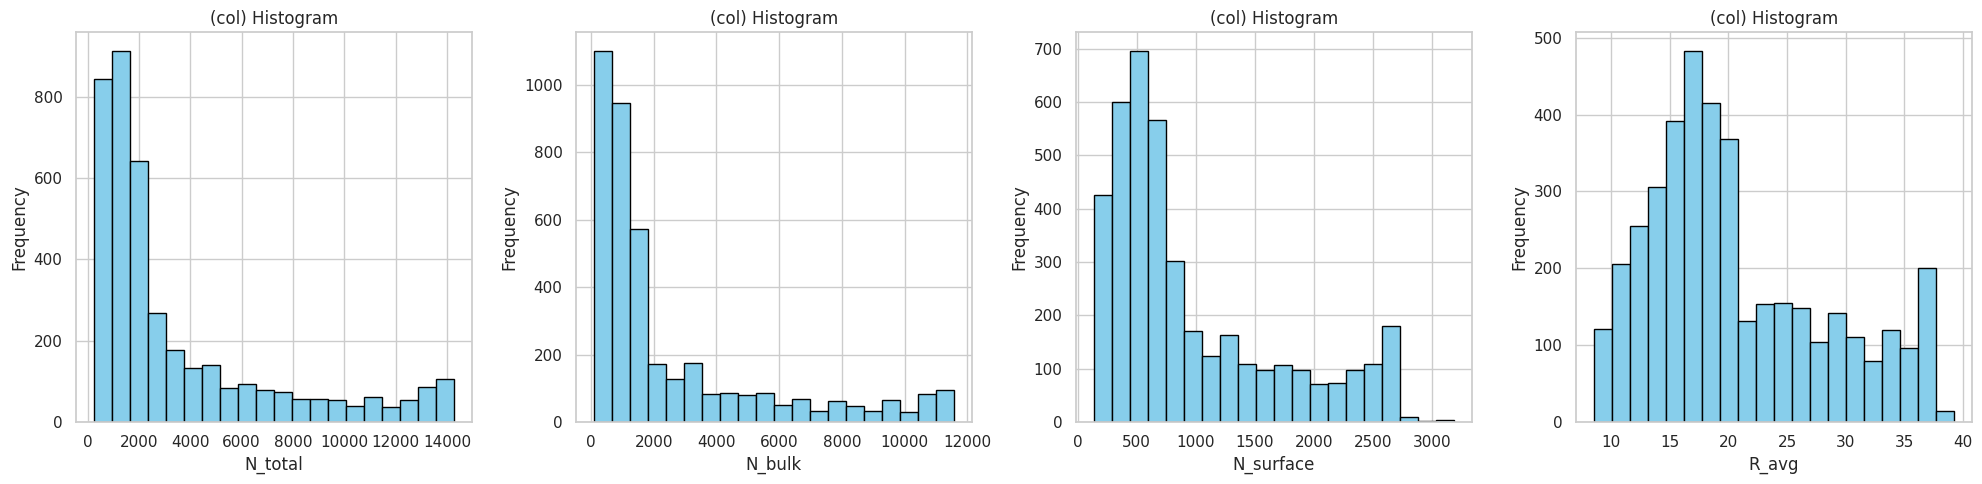

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))
columns = new_df.columns

for i, col in enumerate(columns):
  axes[i].hist(new_df[col], bins=20, color='skyblue', edgecolor='black')
  axes[i].set_title(f'(col) Histogram')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

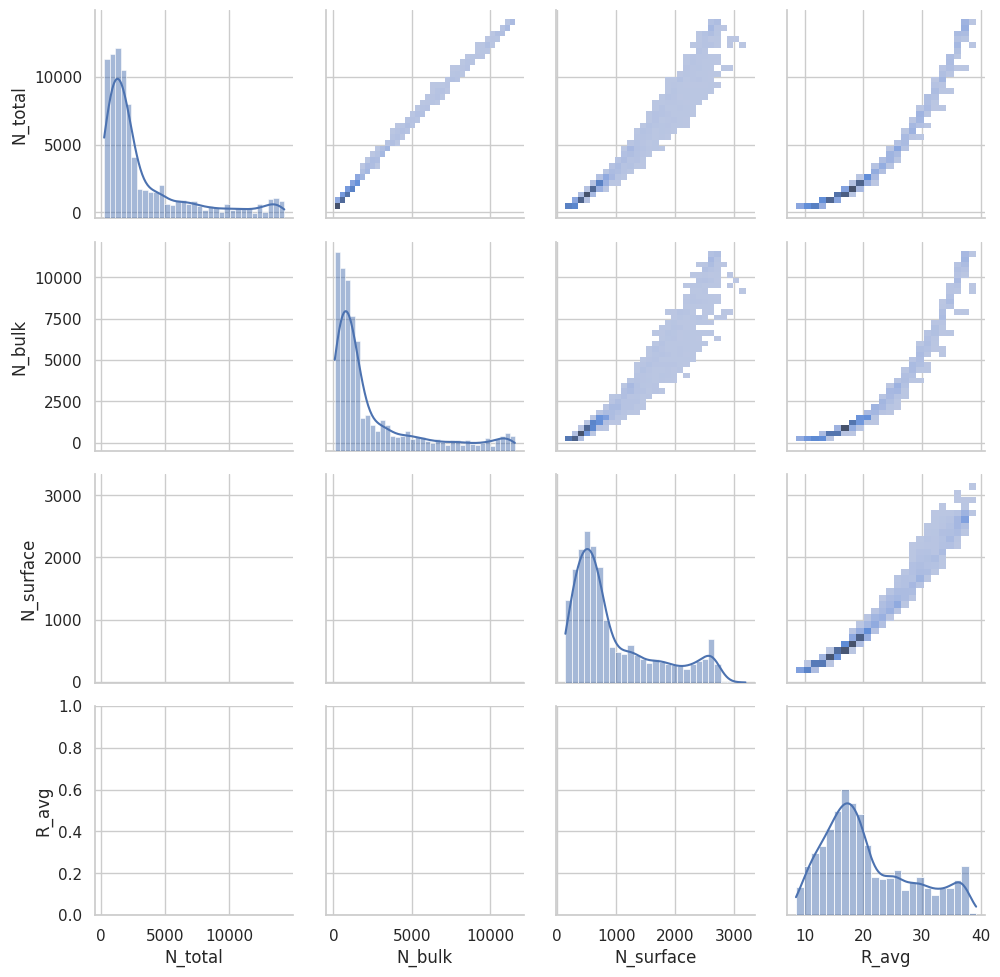

In [ ]:
#create a pairgrid
g = sns.PairGrid(new_df)

#upper triangle: Histogram
g.map_upper(sns.histplot)

#Diagonal:
g.map_diag(sns.histplot,kde=True)